Human Evaluation (Section 5.3.3 Mean, Median and Mode Scores)

Descriptive Statistics:
                         count      mean       std   min       25%   50%  \
Mean Clarity            6464.0  5.334359  1.116786  1.75  4.500000  5.50   
Median Clarity          6464.0  5.470297  1.254440  1.50  5.000000  6.00   
Mode Clarity            4864.0  5.776316  1.323993  1.00  5.000000  6.00   
Mean Informativeness    6464.0  5.587302  0.921729  2.00  5.000000  5.75   
Median Informativeness  6464.0  5.767327  0.971357  2.00  5.000000  6.00   
Mode  Informativeness   5312.0  5.819277  1.121041  2.00  5.000000  6.00   
Mean Effectiveness      6464.0  5.336496  1.079352  2.50  4.428571  5.50   
Median  Effectiveness   6464.0  5.470297  1.185443  2.50  5.000000  6.00   
Mode  Effectiveness     4608.0  5.597222  1.381169  1.00  5.000000  6.00   

                             75%  max  median  variance  range  
Mean Clarity            6.333333  7.0    5.50  1.247211   5.25  
Median Clarity          6.500000  7.0    6.00  1.573619   5.50  
Mode Clarity        

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6464.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5312.
  res = hypotest_fun_out(*samples, **kwds)
<ipython-input-34-bec78d8088cc>:55: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_matrix = correlation_matrix.applymap(lambda x: f"{x:.2f}")


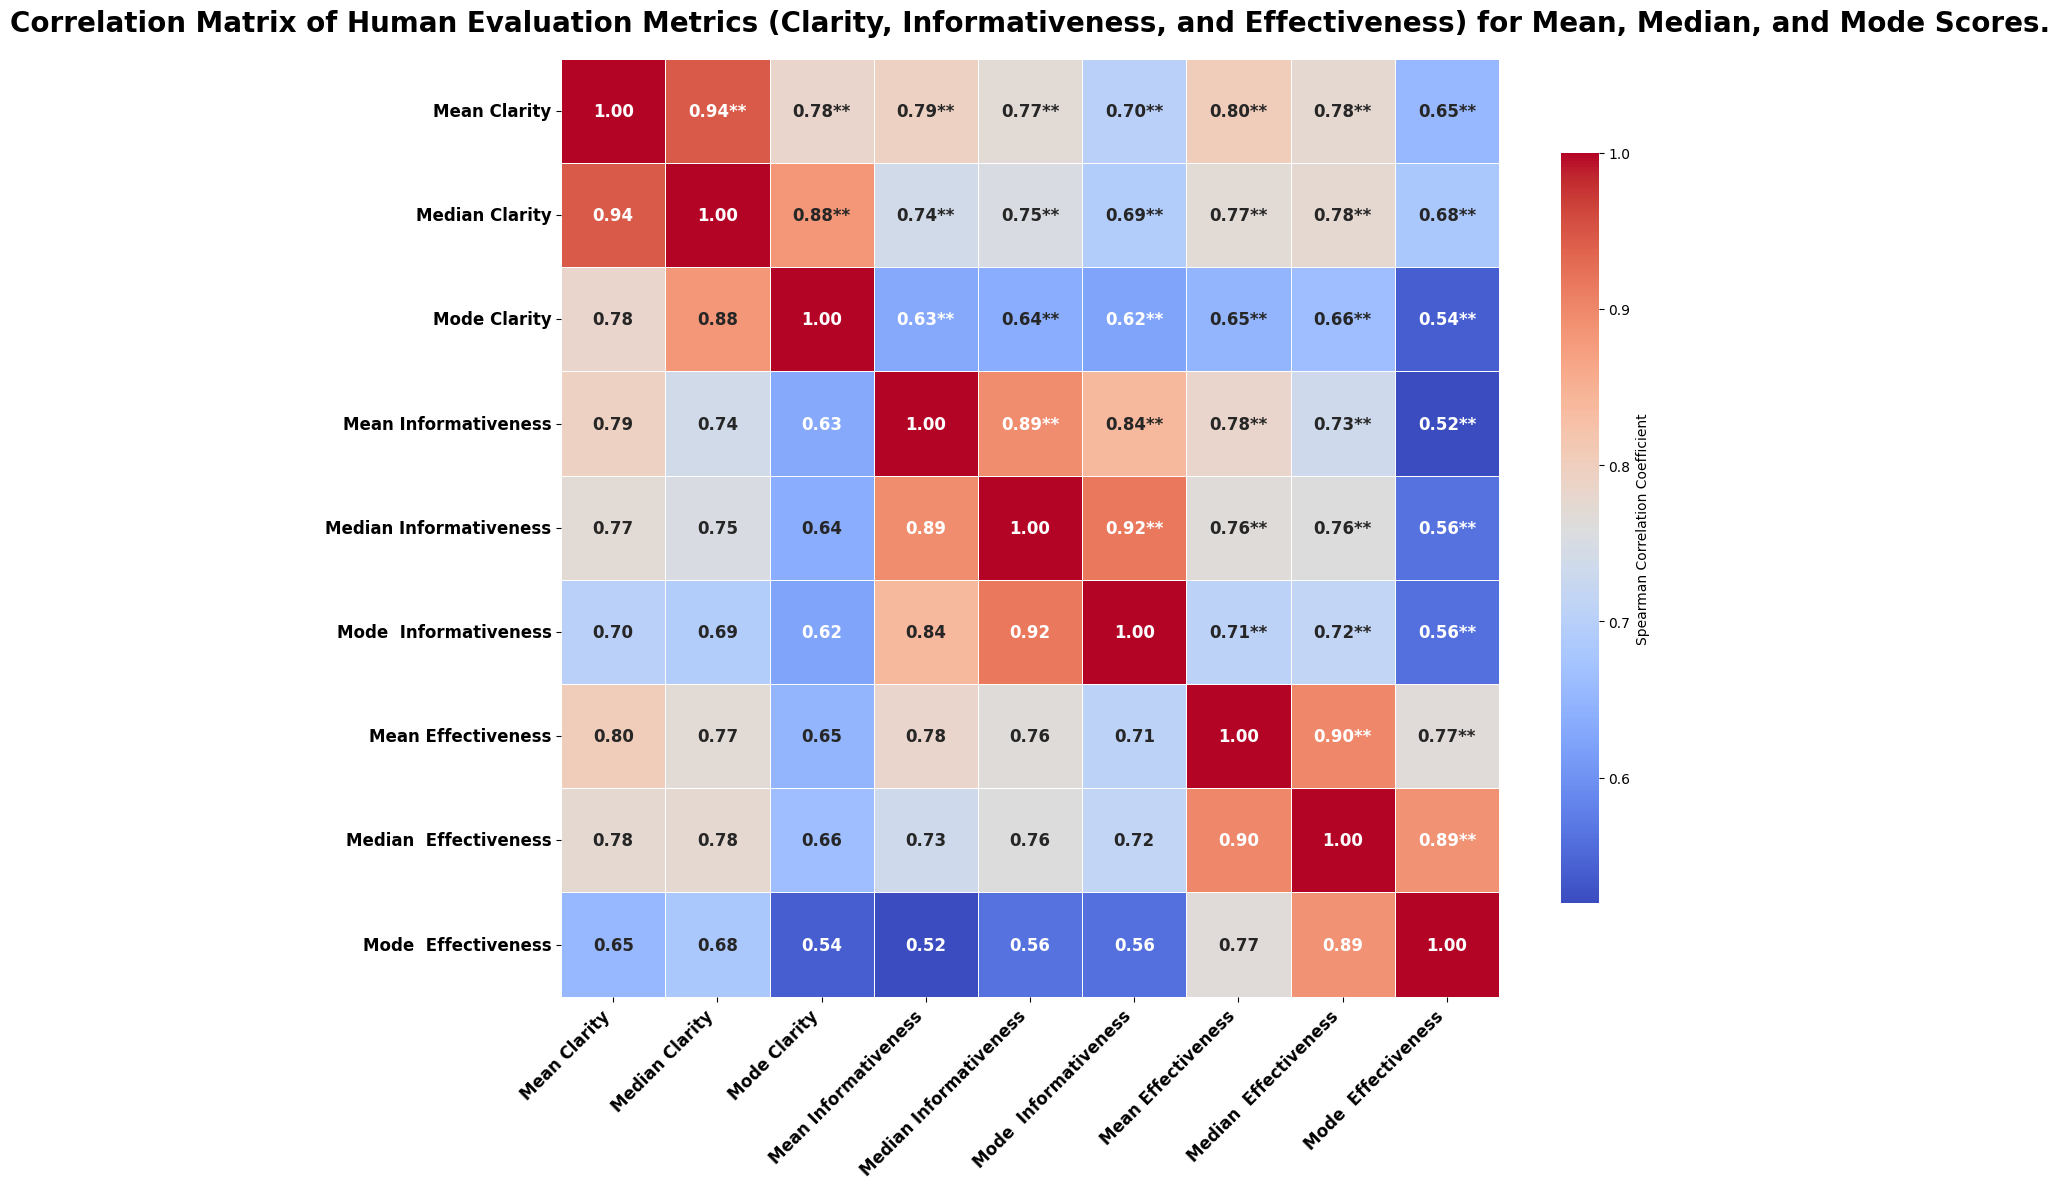

In [34]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr, shapiro
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/mean_mode_meadian.csv")

df = df.apply(pd.to_numeric, errors='coerce')

# 1. Descriptive Statistics
descriptive_stats = df.describe().transpose()
descriptive_stats['median'] = df.median()
descriptive_stats['variance'] = df.var()
descriptive_stats['range'] = df.max() - df.min()
print("Descriptive Statistics:")
print(descriptive_stats)

# 2. Spearman Correlation Matrix with p-values, handling missing values
correlation_matrix = df.corr(method="spearman")  # Initialize correlation matrix with Spearman
p_values_matrix = pd.DataFrame(np.zeros_like(correlation_matrix), columns=df.columns, index=df.columns)

# Calculate Spearman correlations and p-values, handling missing values
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        # Drop rows with NaNs in both columns to ensure equal length
        col_i = df.iloc[:, i]
        col_j = df.iloc[:, j]
        valid_idx = col_i.notna() & col_j.notna()  # Select rows where both columns are non-NaN

        # Only calculate correlation if there are enough data points
        if valid_idx.sum() > 1:
            corr, p_value = spearmanr(col_i[valid_idx], col_j[valid_idx])
            correlation_matrix.iloc[i, j] = corr
            correlation_matrix.iloc[j, i] = corr
            p_values_matrix.iloc[i, j] = p_value
            p_values_matrix.iloc[j, i] = p_value

print("\nSpearman Correlation Matrix:")
print(correlation_matrix)
print("\nP-values for Correlation Matrix:")
print(p_values_matrix)

# 3. Normality Testing (Shapiro-Wilk Test)
normality_results = {}
for column in df.columns:
    stat, p_value = shapiro(df[column].dropna())
    normality_results[column] = {"Shapiro-Wilk Statistic": stat, "p-value": p_value}
normality_df = pd.DataFrame(normality_results).transpose()
print("\nNormality Test (Shapiro-Wilk) Results:")
print(normality_df)

# Annotate both correlation and significance levels
annot_matrix = correlation_matrix.applymap(lambda x: f"{x:.2f}")
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        if i < j:
            p_val = p_values_matrix.iloc[i, j]
            if p_val < 0.05:
                annot_matrix.iloc[i, j] += "*"  # Indicate significance at p < 0.05
            if p_val < 0.01:
                annot_matrix.iloc[i, j] += "*"  # Add another star for p < 0.01


# Set up the figure with a larger size and customized color map
fig, ax = plt.subplots(figsize=(15, 12))
cmap = sns.color_palette("coolwarm", as_cmap=True)  # Use color-blind friendly color map


# Plot the heatmap with specified color map and increased annotation font size
sns.heatmap(
    correlation_matrix,
    cmap=cmap,  # Explicitly use coolwarm for clear red-blue contrast
    cbar_kws={"shrink": 0.8, "label": "Spearman Correlation Coefficient"},  # Color bar label
    annot_kws={"size": 12, "weight": "bold"},  # Increased font size and bold font for annotations
    annot=annot_matrix, fmt="", square=True,
    linewidths=0.5
    # center=0  # Ensure color divergence around zero
)

# Customize axis tick labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')

# Set title and layout adjustments
plt.title("Correlation Matrix of Human Evaluation Metrics (Clarity, Informativeness, and Effectiveness) for Mean, Median, and Mode Scores.", fontsize=20, weight='bold', pad=20)

plt.tight_layout()  # Ensure everything fits within the figure
plt.show()


**Human Evaluation vs. Automatic Metrics  (Section 5.3.4 NLG-based Automatic Evaluation Metrics)**

Descriptive Statistics:
                         count      mean       std       min       25%  \
BLEU                     101.0  0.204777  0.203567  0.009526  0.065356   
ROUGE                    101.0  0.437597  0.197272  0.066667  0.307692   
BLEURT                   101.0  0.641096  0.127159  0.119060  0.571327   
METEOR                   101.0  0.556878  0.191469  0.135870  0.428258   
BERTScore                101.0  0.478921  0.180800  0.074741  0.354420   
BARTScore                101.0  0.772516  0.086235  0.507976  0.723005   
Median Clarity          6464.0  5.470297  1.254440  1.500000  5.000000   
Median Informativeness  6464.0  5.767327  0.971357  2.000000  5.000000   
Median  Effectiveness   6464.0  5.470297  1.185443  2.500000  5.000000   

                             50%       75%       max    median  variance  \
BLEU                    0.149415  0.265295  0.967543  0.149415  0.041440   
ROUGE                   0.425532  0.537313  0.960000  0.425532  0.038916   
BLEURT 

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6464.
  res = hypotest_fun_out(*samples, **kwds)
<ipython-input-35-93457923beee>:55: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_matrix = correlation_matrix.applymap(lambda x: f"{x:.2f}")


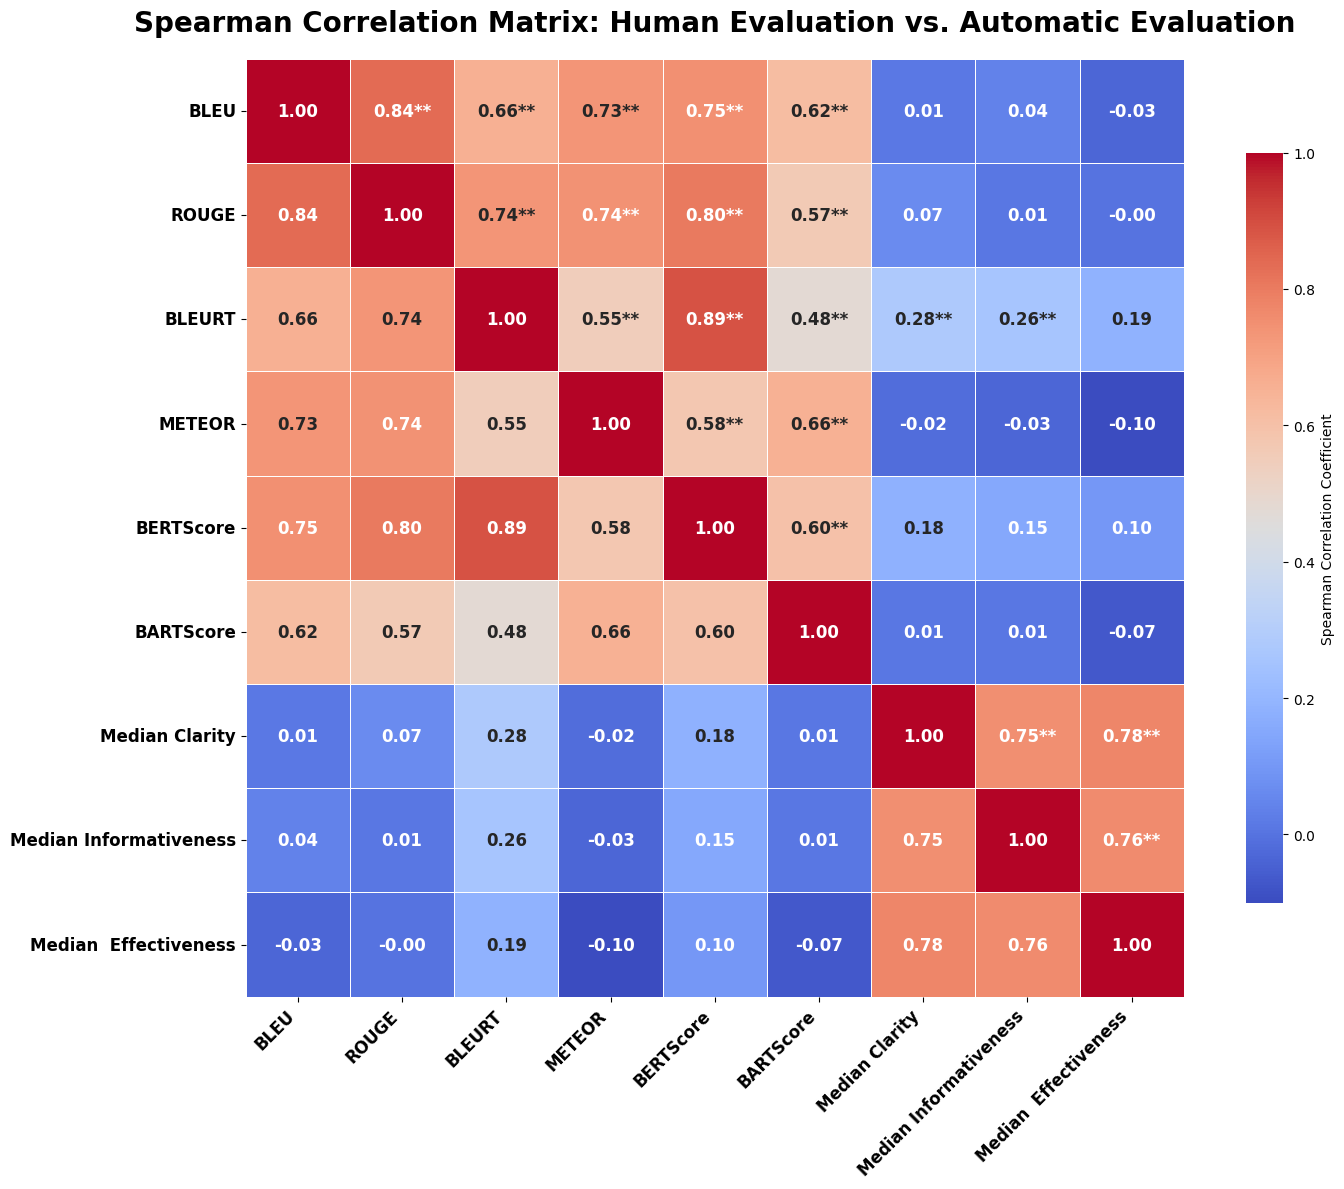

In [35]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr, shapiro
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/human_auto.csv")

df = df.apply(pd.to_numeric, errors='coerce')

# 1. Descriptive Statistics
descriptive_stats = df.describe().transpose()
descriptive_stats['median'] = df.median()
descriptive_stats['variance'] = df.var()
descriptive_stats['range'] = df.max() - df.min()
print("Descriptive Statistics:")
print(descriptive_stats)

# 2. Spearman Correlation Matrix with p-values, handling missing values
correlation_matrix = df.corr(method="spearman")  # Initialize correlation matrix with Spearman
p_values_matrix = pd.DataFrame(np.zeros_like(correlation_matrix), columns=df.columns, index=df.columns)

# Calculate Spearman correlations and p-values, handling missing values
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        # Drop rows with NaNs in both columns to ensure equal length
        col_i = df.iloc[:, i]
        col_j = df.iloc[:, j]
        valid_idx = col_i.notna() & col_j.notna()  # Select rows where both columns are non-NaN

        # Only calculate correlation if there are enough data points
        if valid_idx.sum() > 1:
            corr, p_value = spearmanr(col_i[valid_idx], col_j[valid_idx])
            correlation_matrix.iloc[i, j] = corr
            correlation_matrix.iloc[j, i] = corr
            p_values_matrix.iloc[i, j] = p_value
            p_values_matrix.iloc[j, i] = p_value

print("\nSpearman Correlation Matrix:")
print(correlation_matrix)
print("\nP-values for Correlation Matrix:")
print(p_values_matrix)

# 3. Normality Testing (Shapiro-Wilk Test)
normality_results = {}
for column in df.columns:
    stat, p_value = shapiro(df[column].dropna())
    normality_results[column] = {"Shapiro-Wilk Statistic": stat, "p-value": p_value}
normality_df = pd.DataFrame(normality_results).transpose()
print("\nNormality Test (Shapiro-Wilk) Results:")
print(normality_df)

# Annotate both correlation and significance levels
annot_matrix = correlation_matrix.applymap(lambda x: f"{x:.2f}")
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        if i < j:
            p_val = p_values_matrix.iloc[i, j]
            if p_val < 0.05:
                annot_matrix.iloc[i, j] += "*"  # Indicate significance at p < 0.05
            if p_val < 0.01:
                annot_matrix.iloc[i, j] += "*"  # Add another star for p < 0.01


# Set up the figure with a larger size and customized color map
fig, ax = plt.subplots(figsize=(15, 12))
cmap = sns.color_palette("coolwarm", as_cmap=True)  # Use color-blind friendly color map


# Plot the heatmap with specified color map and increased annotation font size
sns.heatmap(
    correlation_matrix,
    cmap=cmap,  # Explicitly use coolwarm for clear red-blue contrast
    cbar_kws={"shrink": 0.8, "label": "Spearman Correlation Coefficient"},  # Color bar label
    annot_kws={"size": 12, "weight": "bold"},  # Increased font size and bold font for annotations
    annot=annot_matrix, fmt="", square=True,
    linewidths=0.5
    # center=0  # Ensure color divergence around zero
)

# Customize axis tick labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')

# Set title and layout adjustments
plt.title("Spearman Correlation Matrix: Human Evaluation vs. Automatic Evaluation", fontsize=20, weight='bold', pad=20)

plt.tight_layout()  # Ensure everything fits within the figure
plt.show()


**LLMs vs. Human Evaluation** (Section 5.4)

**Pearson**

Descriptive Statistics:
                                count      mean       std  min  25%  50%  75%  \
Median Informativeness         6464.0  5.767327  0.971357  2.0  5.0  6.0  6.0   
Claude Informativeness         6464.0  5.455446  0.980324  2.0  5.0  6.0  6.0   
OpenAI_GPT-4o Informativeness  6464.0  5.247525  1.084683  2.0  5.0  6.0  6.0   
Gemini Informativeness           97.0  5.391753  1.578216  2.0  4.0  6.0  7.0   

                               max  median  variance  range  
Median Informativeness         7.0     6.0  0.943534    5.0  
Claude Informativeness         7.0     6.0  0.961035    5.0  
OpenAI_GPT-4o Informativeness  7.0     6.0  1.176537    5.0  
Gemini Informativeness         7.0     6.0  2.490765    5.0  

Pearson Correlation Matrix:
                               Median Informativeness  Claude Informativeness  \
Median Informativeness                       1.000000                0.438875   
Claude Informativeness                       0.438875                

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6464.
  res = hypotest_fun_out(*samples, **kwds)
<ipython-input-45-35feccac9261>:59: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_matrix = correlation_matrix.applymap(lambda x: f"{x:.2f}")


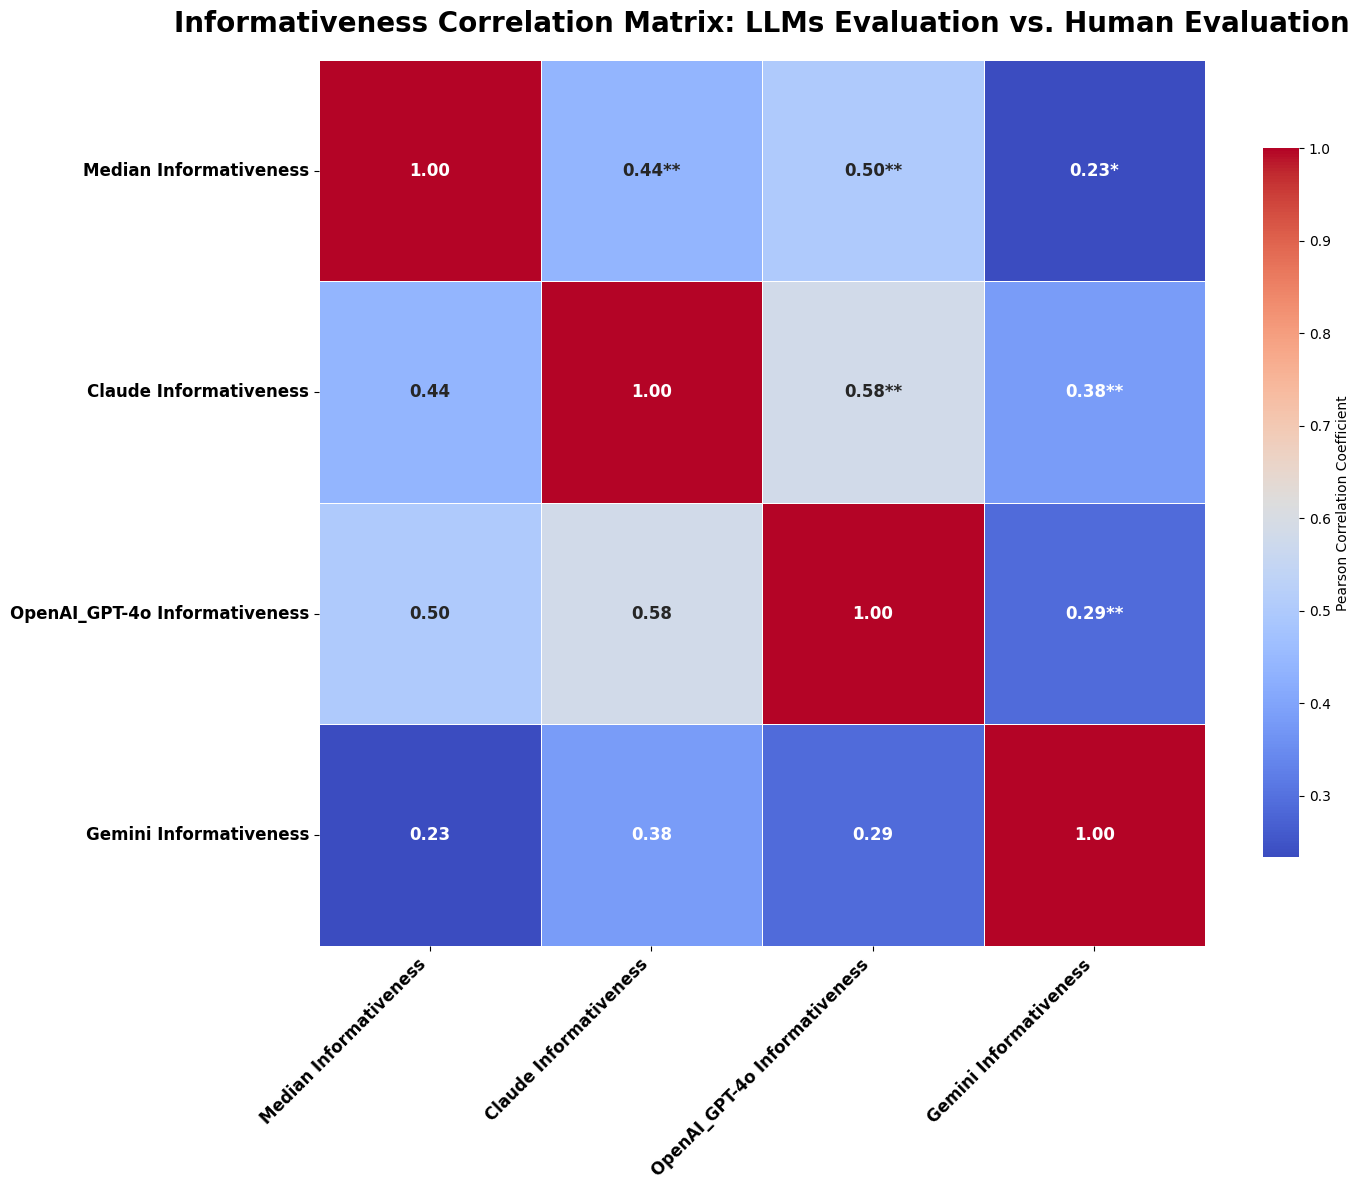

In [45]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, shapiro
import seaborn as sns
import matplotlib.pyplot as plt


# Load the dataset
df = pd.read_csv('/content/llmhuman_informativeness.csv')

df = df.apply(pd.to_numeric, errors='coerce')


# 1. Descriptive Statistics
descriptive_stats = df.describe().transpose()
descriptive_stats['median'] = df.median()
descriptive_stats['variance'] = df.var()
descriptive_stats['range'] = df.max() - df.min()
print("Descriptive Statistics:")
print(descriptive_stats)

# 2. Pearson Correlation Matrix with p-values, handling missing values
correlation_matrix = df.corr(method="pearson")  # Initialize correlation matrix with Pearson
p_values_matrix = pd.DataFrame(np.zeros_like(correlation_matrix), columns=df.columns, index=df.columns)

# Calculate Pearson correlations and p-values, handling missing values
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        # Drop rows with NaNs in both columns to ensure equal length
        col_i = df.iloc[:, i]
        col_j = df.iloc[:, j]
        valid_idx = col_i.notna() & col_j.notna()  # Select rows where both columns are non-NaN

        # Only calculate correlation if there are enough data points
        if valid_idx.sum() > 1:
            corr, p_value = pearsonr(col_i[valid_idx], col_j[valid_idx])
            correlation_matrix.iloc[i, j] = corr
            correlation_matrix.iloc[j, i] = corr
            p_values_matrix.iloc[i, j] = p_value
            p_values_matrix.iloc[j, i] = p_value

print("\nPearson Correlation Matrix:")
print(correlation_matrix)
print("\nP-values for Correlation Matrix:")
print(p_values_matrix)

# 3. Normality Testing (Shapiro-Wilk Test)
normality_results = {}
for column in df.columns:
    stat, p_value = shapiro(df[column].dropna())
    normality_results[column] = {"Shapiro-Wilk Statistic": stat, "p-value": p_value}
normality_df = pd.DataFrame(normality_results).transpose()
print("\nNormality Test (Shapiro-Wilk) Results:")
print(normality_df)



# Annotate both correlation and significance levels
annot_matrix = correlation_matrix.applymap(lambda x: f"{x:.2f}")
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        if i < j:
            p_val = p_values_matrix.iloc[i, j]
            if p_val < 0.05:
                annot_matrix.iloc[i, j] += "*"  # Indicate significance at p < 0.05
            if p_val < 0.01:
                annot_matrix.iloc[i, j] += "*"  # Add another star for p < 0.01


# Set up the figure with a larger size and customized color map
fig, ax = plt.subplots(figsize=(15, 12))
cmap = sns.color_palette("coolwarm", as_cmap=True)  # Use color-blind friendly color map


# Plot the heatmap with specified color map and increased annotation font size
sns.heatmap(
    correlation_matrix,
    cmap=cmap,  # Explicitly use coolwarm for clear red-blue contrast
    cbar_kws={"shrink": 0.8, "label": "Pearson Correlation Coefficient"},  # Color bar label
    annot_kws={"size": 12, "weight": "bold"},  # Increased font size and bold font for annotations
    annot=annot_matrix, fmt="", square=True,
    linewidths=0.5
    # center=0  # Ensure color divergence around zero
)

# Customize axis tick labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')

# Set title and layout adjustments
plt.title("Informativeness Correlation Matrix: LLMs Evaluation vs. Human Evaluation", fontsize=20, weight='bold', pad=20)

plt.tight_layout()  # Ensure everything fits within the figure
plt.show()


Spearman

Descriptive Statistics:
                                count      mean       std  min  25%  50%  75%  \
Median Informativeness         6464.0  5.767327  0.971357  2.0  5.0  6.0  6.0   
Claude Informativeness         6464.0  5.455446  0.980324  2.0  5.0  6.0  6.0   
OpenAI_GPT-4o Informativeness  6464.0  5.247525  1.084683  2.0  5.0  6.0  6.0   
Gemini Informativeness           97.0  5.391753  1.578216  2.0  4.0  6.0  7.0   

                               max  median  variance  range  
Median Informativeness         7.0     6.0  0.943534    5.0  
Claude Informativeness         7.0     6.0  0.961035    5.0  
OpenAI_GPT-4o Informativeness  7.0     6.0  1.176537    5.0  
Gemini Informativeness         7.0     6.0  2.490765    5.0  

Spearman Correlation Matrix:
                               Median Informativeness  Claude Informativeness  \
Median Informativeness                       1.000000                0.334837   
Claude Informativeness                       0.334837               

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6464.
  res = hypotest_fun_out(*samples, **kwds)
<ipython-input-46-9801999cc1df>:50: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_matrix = correlation_matrix.applymap(lambda x: f"{x:.2f}")


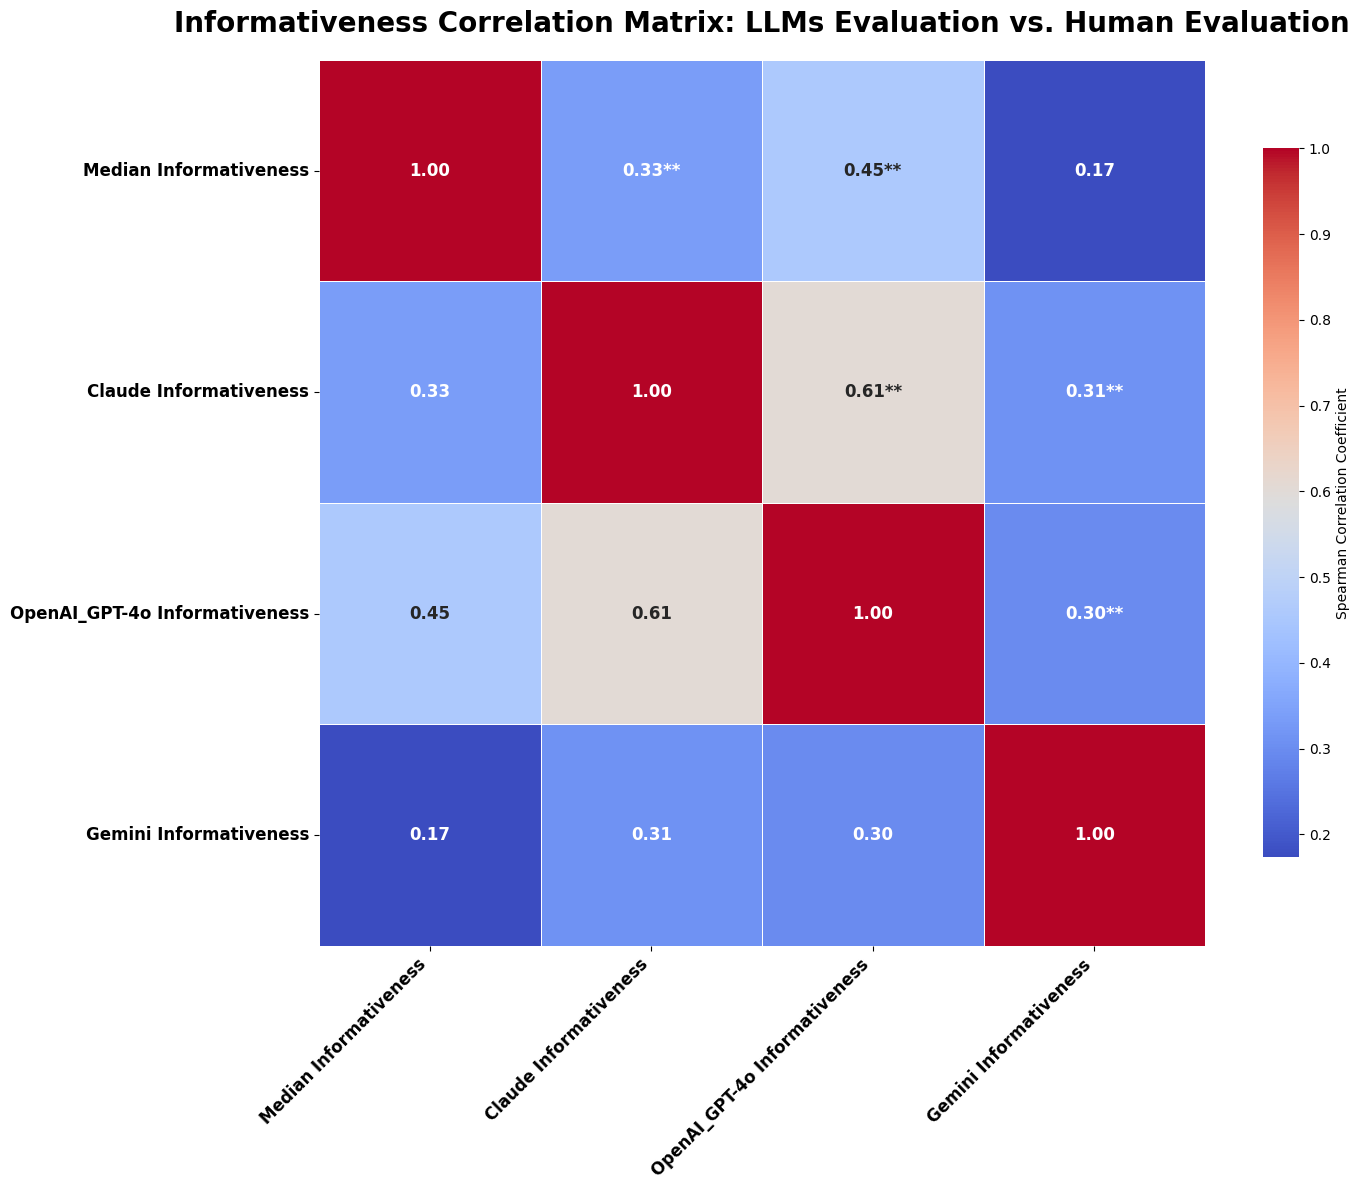

In [46]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr, shapiro
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Descriptive Statistics
descriptive_stats = df.describe().transpose()
descriptive_stats['median'] = df.median()
descriptive_stats['variance'] = df.var()
descriptive_stats['range'] = df.max() - df.min()
print("Descriptive Statistics:")
print(descriptive_stats)

# 2. Spearman Correlation Matrix with p-values, handling missing values
correlation_matrix = df.corr(method="spearman")  # Initialize correlation matrix with Spearman
p_values_matrix = pd.DataFrame(np.zeros_like(correlation_matrix), columns=df.columns, index=df.columns)

# Calculate Spearman correlations and p-values, handling missing values
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        # Drop rows with NaNs in both columns to ensure equal length
        col_i = df.iloc[:, i]
        col_j = df.iloc[:, j]
        valid_idx = col_i.notna() & col_j.notna()  # Select rows where both columns are non-NaN

        # Only calculate correlation if there are enough data points
        if valid_idx.sum() > 1:
            corr, p_value = spearmanr(col_i[valid_idx], col_j[valid_idx])
            correlation_matrix.iloc[i, j] = corr
            correlation_matrix.iloc[j, i] = corr
            p_values_matrix.iloc[i, j] = p_value
            p_values_matrix.iloc[j, i] = p_value

print("\nSpearman Correlation Matrix:")
print(correlation_matrix)
print("\nP-values for Correlation Matrix:")
print(p_values_matrix)

# 3. Normality Testing (Shapiro-Wilk Test)
normality_results = {}
for column in df.columns:
    stat, p_value = shapiro(df[column].dropna())
    normality_results[column] = {"Shapiro-Wilk Statistic": stat, "p-value": p_value}
normality_df = pd.DataFrame(normality_results).transpose()
print("\nNormality Test (Shapiro-Wilk) Results:")
print(normality_df)

# Annotate both correlation and significance levels
annot_matrix = correlation_matrix.applymap(lambda x: f"{x:.2f}")
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        if i < j:
            p_val = p_values_matrix.iloc[i, j]
            if p_val < 0.05:
                annot_matrix.iloc[i, j] += "*"  # Indicate significance at p < 0.05
            if p_val < 0.01:
                annot_matrix.iloc[i, j] += "*"  # Add another star for p < 0.01


# Set up the figure with a larger size and customized color map
fig, ax = plt.subplots(figsize=(15, 12))
cmap = sns.color_palette("coolwarm", as_cmap=True)  # Use color-blind friendly color map


# Plot the heatmap with specified color map and increased annotation font size
sns.heatmap(
    correlation_matrix,
    cmap=cmap,  # Explicitly use coolwarm for clear red-blue contrast
    cbar_kws={"shrink": 0.8, "label": "Spearman Correlation Coefficient"},  # Color bar label
    annot_kws={"size": 12, "weight": "bold"},  # Increased font size and bold font for annotations
    annot=annot_matrix, fmt="", square=True,
    linewidths=0.5
    # center=0  # Ensure color divergence around zero
)

# Customize axis tick labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')

# Set title and layout adjustments
plt.title("Informativeness Correlation Matrix: LLMs Evaluation vs. Human Evaluation", fontsize=20, weight='bold', pad=20)

plt.tight_layout()  # Ensure everything fits within the figure
plt.show()


Effectiveness

Pearson

Descriptive Statistics:
                              count      mean       std  min  25%  50%  75%  \
Median  Effectiveness        6464.0  5.470297  1.185443  2.5  5.0  6.0  6.0   
Claude Effectiveness         6464.0  4.980198  1.098961  2.0  4.0  5.0  6.0   
OpenAI_GPT-4o Effectiveness  6464.0  5.386139  1.062214  3.0  5.0  6.0  6.0   
Gemini Effectiveness           97.0  5.371134  1.679035  1.0  4.0  6.0  7.0   

                             max  median  variance  range  
Median  Effectiveness        7.0     6.0  1.405276    4.5  
Claude Effectiveness         7.0     5.0  1.207716    5.0  
OpenAI_GPT-4o Effectiveness  7.0     6.0  1.128299    4.0  
Gemini Effectiveness         7.0     6.0  2.819158    6.0  

Pearson Correlation Matrix:
                             Median  Effectiveness  Claude Effectiveness  \
Median  Effectiveness                     1.000000              0.432817   
Claude Effectiveness                      0.432817              1.000000   
OpenAI_GPT-4o Effective

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6464.
  res = hypotest_fun_out(*samples, **kwds)
<ipython-input-47-40631380060d>:60: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_matrix = correlation_matrix.applymap(lambda x: f"{x:.2f}")


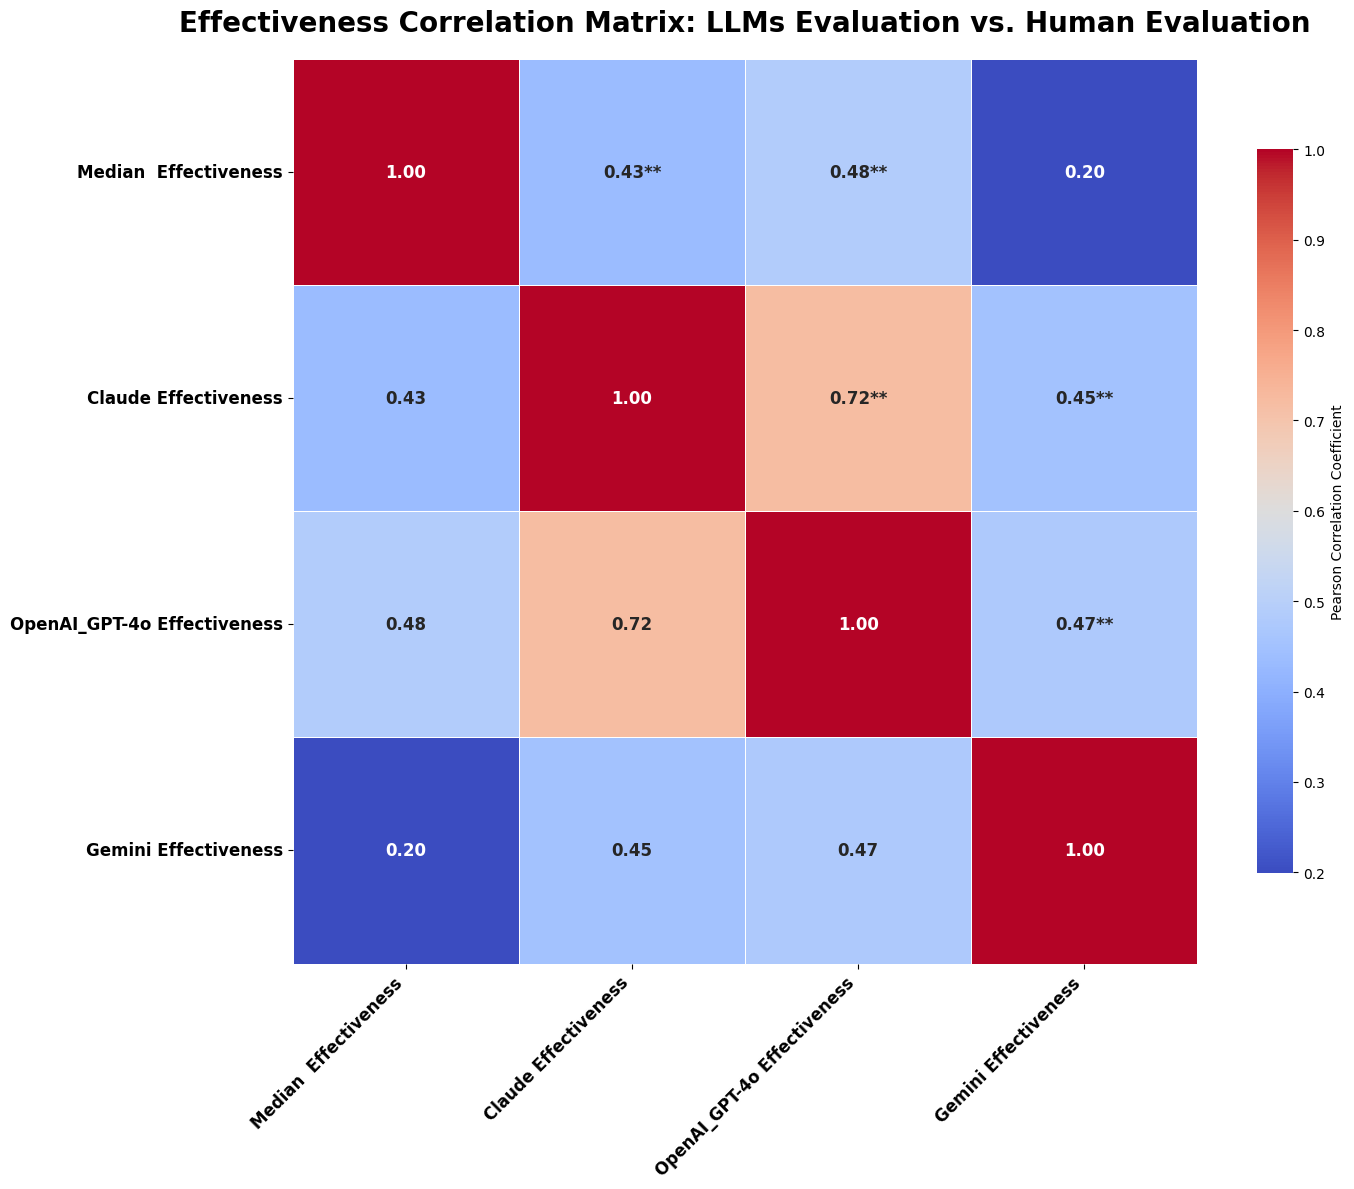

In [47]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, shapiro
import seaborn as sns
import matplotlib.pyplot as plt


# Load the dataset
df = pd.read_csv('/content/llmhuman_effectiveness.csv')

df = df.apply(pd.to_numeric, errors='coerce')

# Calculate the Pearson correlation matrix
corr = df.corr(method='pearson')
# 1. Descriptive Statistics
descriptive_stats = df.describe().transpose()
descriptive_stats['median'] = df.median()
descriptive_stats['variance'] = df.var()
descriptive_stats['range'] = df.max() - df.min()
print("Descriptive Statistics:")
print(descriptive_stats)

# 2. Pearson Correlation Matrix with p-values, handling missing values
correlation_matrix = df.corr(method="pearson")  # Initialize correlation matrix with Pearson
p_values_matrix = pd.DataFrame(np.zeros_like(correlation_matrix), columns=df.columns, index=df.columns)

# Calculate Pearson correlations and p-values, handling missing values
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        # Drop rows with NaNs in both columns to ensure equal length
        col_i = df.iloc[:, i]
        col_j = df.iloc[:, j]
        valid_idx = col_i.notna() & col_j.notna()  # Select rows where both columns are non-NaN

        # Only calculate correlation if there are enough data points
        if valid_idx.sum() > 1:
            corr, p_value = pearsonr(col_i[valid_idx], col_j[valid_idx])
            correlation_matrix.iloc[i, j] = corr
            correlation_matrix.iloc[j, i] = corr
            p_values_matrix.iloc[i, j] = p_value
            p_values_matrix.iloc[j, i] = p_value

print("\nPearson Correlation Matrix:")
print(correlation_matrix)
print("\nP-values for Correlation Matrix:")
print(p_values_matrix)

# 3. Normality Testing (Shapiro-Wilk Test)
normality_results = {}
for column in df.columns:
    stat, p_value = shapiro(df[column].dropna())
    normality_results[column] = {"Shapiro-Wilk Statistic": stat, "p-value": p_value}
normality_df = pd.DataFrame(normality_results).transpose()
print("\nNormality Test (Shapiro-Wilk) Results:")
print(normality_df)



# Annotate both correlation and significance levels
annot_matrix = correlation_matrix.applymap(lambda x: f"{x:.2f}")
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        if i < j:
            p_val = p_values_matrix.iloc[i, j]
            if p_val < 0.05:
                annot_matrix.iloc[i, j] += "*"  # Indicate significance at p < 0.05
            if p_val < 0.01:
                annot_matrix.iloc[i, j] += "*"  # Add another star for p < 0.01


# Set up the figure with a larger size and customized color map
fig, ax = plt.subplots(figsize=(15, 12))
cmap = sns.color_palette("coolwarm", as_cmap=True)  # Use color-blind friendly color map


# Plot the heatmap with specified color map and increased annotation font size
sns.heatmap(
    correlation_matrix,
    cmap=cmap,  # Explicitly use coolwarm for clear red-blue contrast
    cbar_kws={"shrink": 0.8, "label": "Pearson Correlation Coefficient"},  # Color bar label
    annot_kws={"size": 12, "weight": "bold"},  # Increased font size and bold font for annotations
    annot=annot_matrix, fmt="", square=True,
    linewidths=0.5
    # center=0  # Ensure color divergence around zero
)

# Customize axis tick labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')

# Set title and layout adjustments
plt.title("Effectiveness Correlation Matrix: LLMs Evaluation vs. Human Evaluation", fontsize=20, weight='bold', pad=20)

plt.tight_layout()  # Ensure everything fits within the figure
plt.show()


Spearman

Descriptive Statistics:
                              count      mean       std  min  25%  50%  75%  \
Median  Effectiveness        6464.0  5.470297  1.185443  2.5  5.0  6.0  6.0   
Claude Effectiveness         6464.0  4.980198  1.098961  2.0  4.0  5.0  6.0   
OpenAI_GPT-4o Effectiveness  6464.0  5.386139  1.062214  3.0  5.0  6.0  6.0   
Gemini Effectiveness           97.0  5.371134  1.679035  1.0  4.0  6.0  7.0   

                             max  median  variance  range  
Median  Effectiveness        7.0     6.0  1.405276    4.5  
Claude Effectiveness         7.0     5.0  1.207716    5.0  
OpenAI_GPT-4o Effectiveness  7.0     6.0  1.128299    4.0  
Gemini Effectiveness         7.0     6.0  2.819158    6.0  

Spearman Correlation Matrix:
                             Median  Effectiveness  Claude Effectiveness  \
Median  Effectiveness                     1.000000              0.400154   
Claude Effectiveness                      0.400154              1.000000   
OpenAI_GPT-4o Effectiv

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6464.
  res = hypotest_fun_out(*samples, **kwds)
<ipython-input-48-47c720889aff>:50: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_matrix = correlation_matrix.applymap(lambda x: f"{x:.2f}")


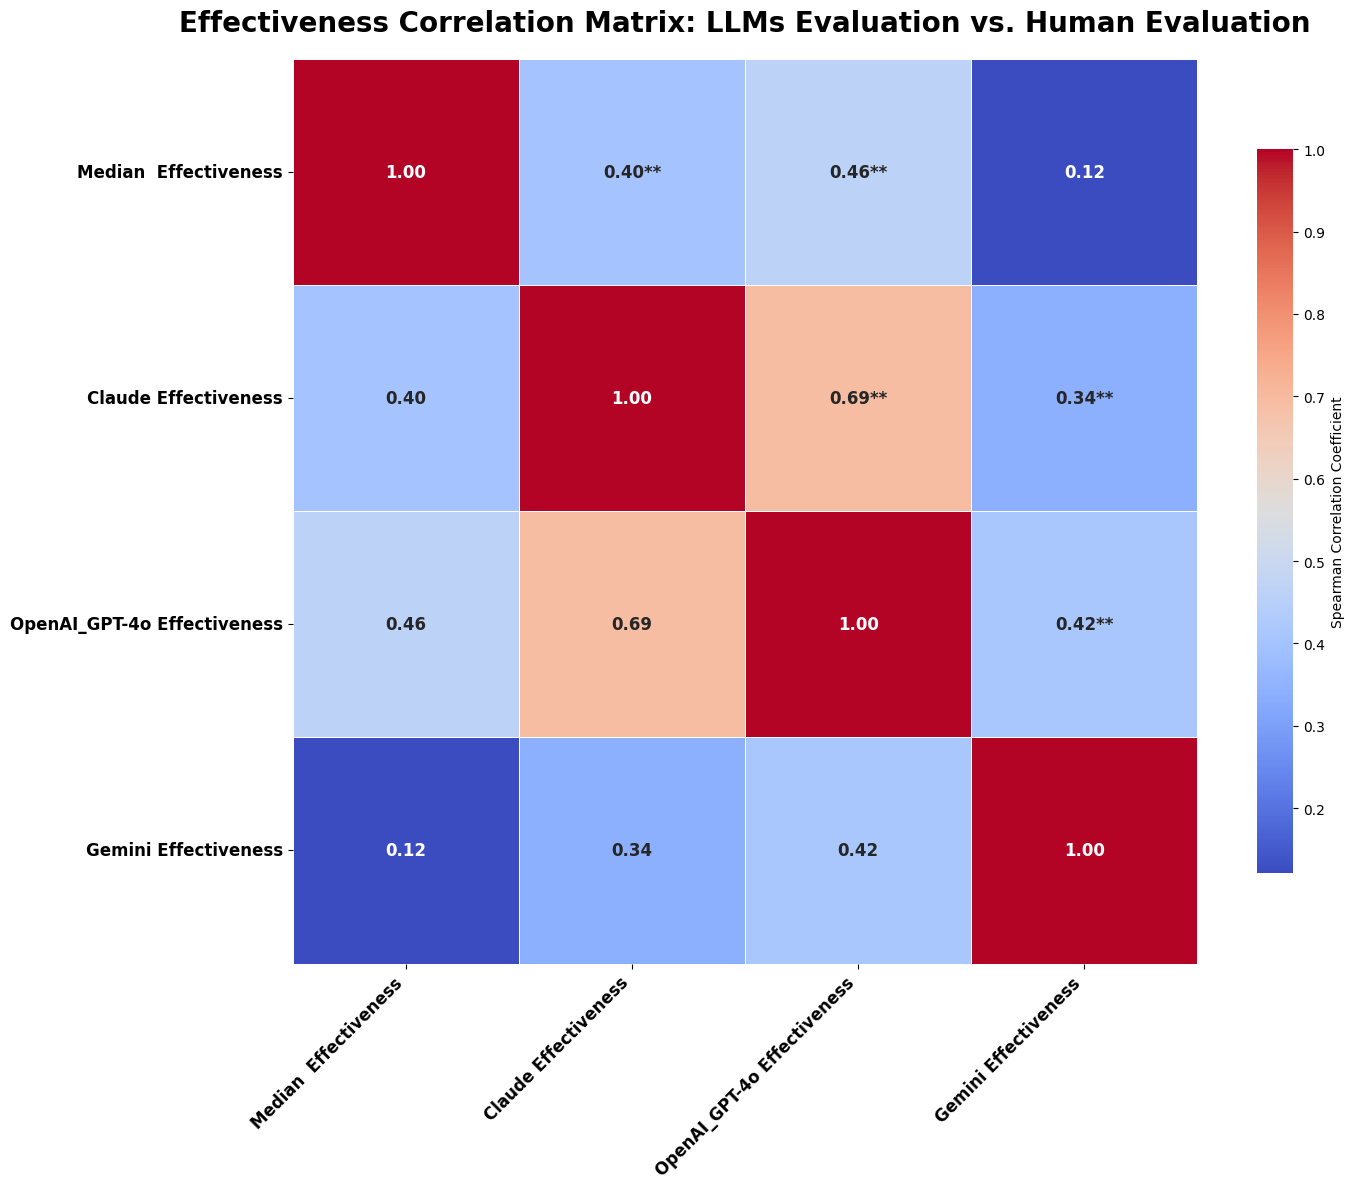

In [48]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr, shapiro
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Descriptive Statistics
descriptive_stats = df.describe().transpose()
descriptive_stats['median'] = df.median()
descriptive_stats['variance'] = df.var()
descriptive_stats['range'] = df.max() - df.min()
print("Descriptive Statistics:")
print(descriptive_stats)

# 2. Spearman Correlation Matrix with p-values, handling missing values
correlation_matrix = df.corr(method="spearman")  # Initialize correlation matrix with Spearman
p_values_matrix = pd.DataFrame(np.zeros_like(correlation_matrix), columns=df.columns, index=df.columns)

# Calculate Spearman correlations and p-values, handling missing values
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        # Drop rows with NaNs in both columns to ensure equal length
        col_i = df.iloc[:, i]
        col_j = df.iloc[:, j]
        valid_idx = col_i.notna() & col_j.notna()  # Select rows where both columns are non-NaN

        # Only calculate correlation if there are enough data points
        if valid_idx.sum() > 1:
            corr, p_value = spearmanr(col_i[valid_idx], col_j[valid_idx])
            correlation_matrix.iloc[i, j] = corr
            correlation_matrix.iloc[j, i] = corr
            p_values_matrix.iloc[i, j] = p_value
            p_values_matrix.iloc[j, i] = p_value

print("\nSpearman Correlation Matrix:")
print(correlation_matrix)
print("\nP-values for Correlation Matrix:")
print(p_values_matrix)

# 3. Normality Testing (Shapiro-Wilk Test)
normality_results = {}
for column in df.columns:
    stat, p_value = shapiro(df[column].dropna())
    normality_results[column] = {"Shapiro-Wilk Statistic": stat, "p-value": p_value}
normality_df = pd.DataFrame(normality_results).transpose()
print("\nNormality Test (Shapiro-Wilk) Results:")
print(normality_df)

# Annotate both correlation and significance levels
annot_matrix = correlation_matrix.applymap(lambda x: f"{x:.2f}")
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        if i < j:
            p_val = p_values_matrix.iloc[i, j]
            if p_val < 0.05:
                annot_matrix.iloc[i, j] += "*"  # Indicate significance at p < 0.05
            if p_val < 0.01:
                annot_matrix.iloc[i, j] += "*"  # Add another star for p < 0.01


# Set up the figure with a larger size and customized color map
fig, ax = plt.subplots(figsize=(15, 12))
cmap = sns.color_palette("coolwarm", as_cmap=True)  # Use color-blind friendly color map


# Plot the heatmap with specified color map and increased annotation font size
sns.heatmap(
    correlation_matrix,
    cmap=cmap,  # Explicitly use coolwarm for clear red-blue contrast
    cbar_kws={"shrink": 0.8, "label": "Spearman Correlation Coefficient"},  # Color bar label
    annot_kws={"size": 12, "weight": "bold"},  # Increased font size and bold font for annotations
    annot=annot_matrix, fmt="", square=True,
    linewidths=0.5
    # center=0  # Ensure color divergence around zero
)

# Customize axis tick labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')

# Set title and layout adjustments
plt.title("Effectiveness Correlation Matrix: LLMs Evaluation vs. Human Evaluation", fontsize=20, weight='bold', pad=20)

plt.tight_layout()  # Ensure everything fits within the figure
plt.show()


Clarity

Pearson

Descriptive Statistics:
                        count      mean       std  min  25%  50%  75%  max  \
Median Clarity         6464.0  5.470297  1.254440  1.5  5.0  6.0  6.5  7.0   
Claude Clarity         6464.0  5.930693  0.914828  2.0  6.0  6.0  6.0  7.0   
OpenAI_GPT-4o Clarity  6464.0  5.851485  1.066084  3.0  5.0  6.0  7.0  7.0   
Gemini Clarity           97.0  5.731959  1.319055  2.0  5.0  6.0  7.0  7.0   

                       median  variance  range  
Median Clarity            6.0  1.573619    5.5  
Claude Clarity            6.0  0.836910    5.0  
OpenAI_GPT-4o Clarity     6.0  1.136535    4.0  
Gemini Clarity            6.0  1.739905    5.0  

Pearson Correlation Matrix:
                       Median Clarity  Claude Clarity  OpenAI_GPT-4o Clarity  \
Median Clarity               1.000000        0.416709               0.500217   
Claude Clarity               0.416709        1.000000               0.690035   
OpenAI_GPT-4o Clarity        0.500217        0.690035               1.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6464.
  res = hypotest_fun_out(*samples, **kwds)
<ipython-input-49-3fdb978ae31a>:60: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_matrix = correlation_matrix.applymap(lambda x: f"{x:.2f}")


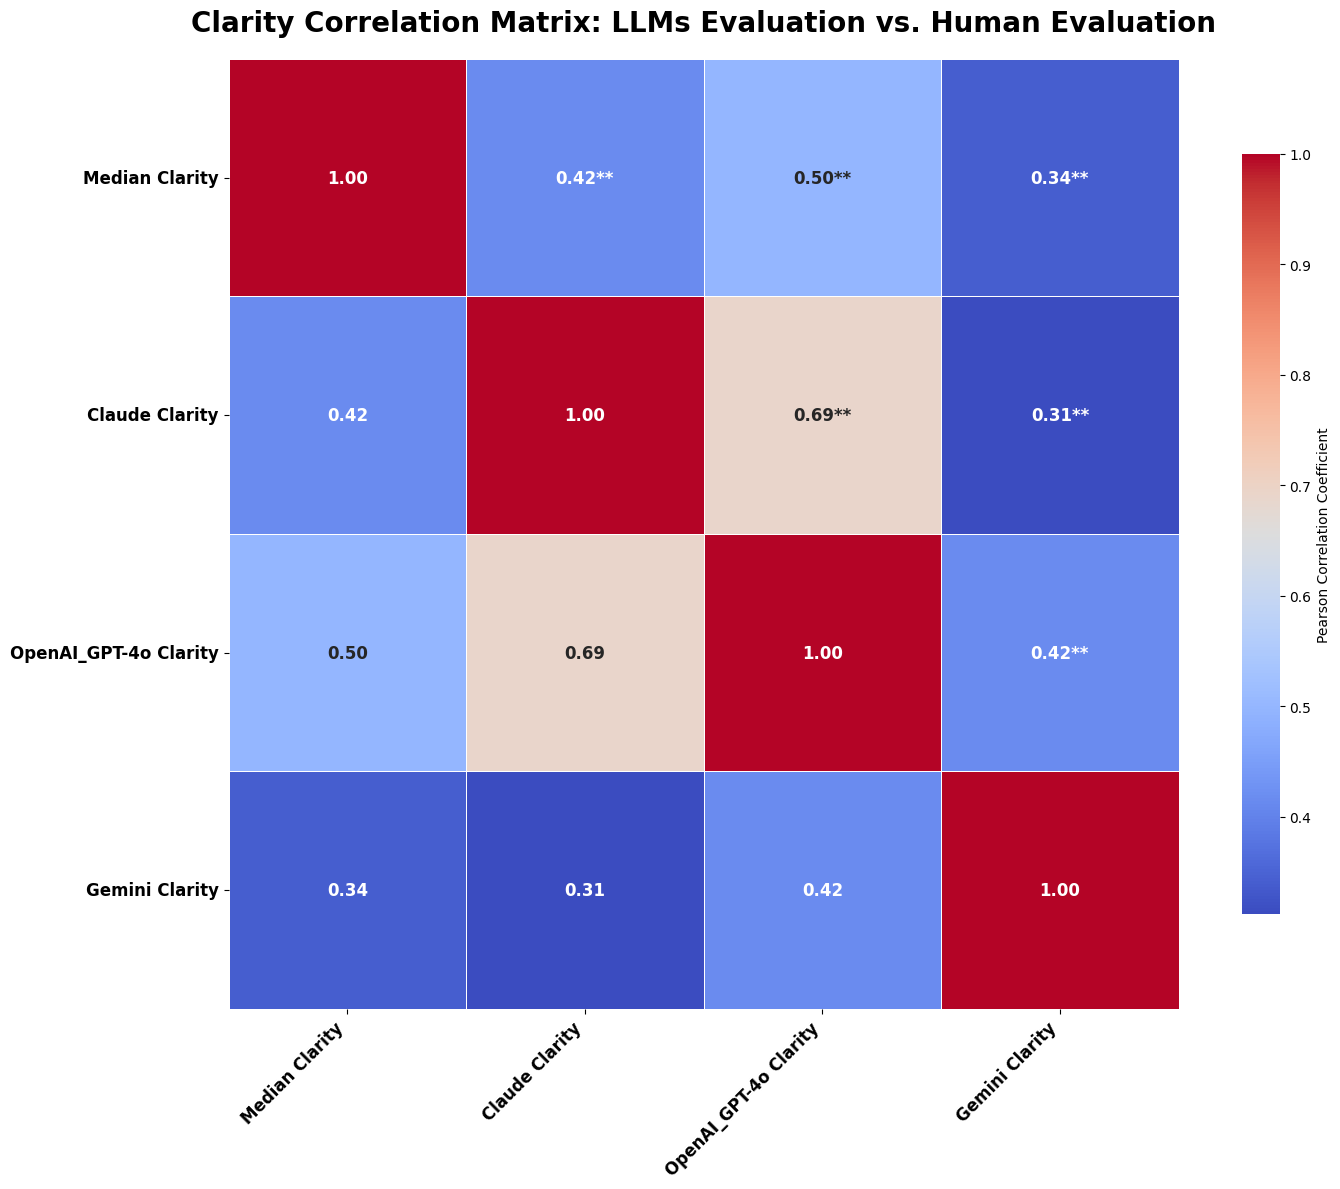

In [49]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr, shapiro
import seaborn as sns
import matplotlib.pyplot as plt


# Load the dataset
df = pd.read_csv('/content/llmhuman_clarity.csv')

df = df.apply(pd.to_numeric, errors='coerce')

# Calculate the Pearson correlation matrix
corr = df.corr(method='pearson')
# 1. Descriptive Statistics
descriptive_stats = df.describe().transpose()
descriptive_stats['median'] = df.median()
descriptive_stats['variance'] = df.var()
descriptive_stats['range'] = df.max() - df.min()
print("Descriptive Statistics:")
print(descriptive_stats)

# 2. Pearson Correlation Matrix with p-values, handling missing values
correlation_matrix = df.corr(method="pearson")  # Initialize correlation matrix with Pearson
p_values_matrix = pd.DataFrame(np.zeros_like(correlation_matrix), columns=df.columns, index=df.columns)

# Calculate Pearson correlations and p-values, handling missing values
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        # Drop rows with NaNs in both columns to ensure equal length
        col_i = df.iloc[:, i]
        col_j = df.iloc[:, j]
        valid_idx = col_i.notna() & col_j.notna()  # Select rows where both columns are non-NaN

        # Only calculate correlation if there are enough data points
        if valid_idx.sum() > 1:
            corr, p_value = pearsonr(col_i[valid_idx], col_j[valid_idx])
            correlation_matrix.iloc[i, j] = corr
            correlation_matrix.iloc[j, i] = corr
            p_values_matrix.iloc[i, j] = p_value
            p_values_matrix.iloc[j, i] = p_value

print("\nPearson Correlation Matrix:")
print(correlation_matrix)
print("\nP-values for Correlation Matrix:")
print(p_values_matrix)

# 3. Normality Testing (Shapiro-Wilk Test)
normality_results = {}
for column in df.columns:
    stat, p_value = shapiro(df[column].dropna())
    normality_results[column] = {"Shapiro-Wilk Statistic": stat, "p-value": p_value}
normality_df = pd.DataFrame(normality_results).transpose()
print("\nNormality Test (Shapiro-Wilk) Results:")
print(normality_df)



# Annotate both correlation and significance levels
annot_matrix = correlation_matrix.applymap(lambda x: f"{x:.2f}")
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        if i < j:
            p_val = p_values_matrix.iloc[i, j]
            if p_val < 0.05:
                annot_matrix.iloc[i, j] += "*"  # Indicate significance at p < 0.05
            if p_val < 0.01:
                annot_matrix.iloc[i, j] += "*"  # Add another star for p < 0.01


# Set up the figure with a larger size and customized color map
fig, ax = plt.subplots(figsize=(15, 12))
cmap = sns.color_palette("coolwarm", as_cmap=True)  # Use color-blind friendly color map


# Plot the heatmap with specified color map and increased annotation font size
sns.heatmap(
    correlation_matrix,
    cmap=cmap,  # Explicitly use coolwarm for clear red-blue contrast
    cbar_kws={"shrink": 0.8, "label": "Pearson Correlation Coefficient"},  # Color bar label
    annot_kws={"size": 12, "weight": "bold"},  # Increased font size and bold font for annotations
    annot=annot_matrix, fmt="", square=True,
    linewidths=0.5
    # center=0  # Ensure color divergence around zero
)

# Customize axis tick labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')

# Set title and layout adjustments
plt.title("Clarity Correlation Matrix: LLMs Evaluation vs. Human Evaluation", fontsize=20, weight='bold', pad=20)

plt.tight_layout()  # Ensure everything fits within the figure
plt.show()


Spearman

Descriptive Statistics:
                        count      mean       std  min  25%  50%  75%  max  \
Median Clarity         6464.0  5.470297  1.254440  1.5  5.0  6.0  6.5  7.0   
Claude Clarity         6464.0  5.930693  0.914828  2.0  6.0  6.0  6.0  7.0   
OpenAI_GPT-4o Clarity  6464.0  5.851485  1.066084  3.0  5.0  6.0  7.0  7.0   
Gemini Clarity           97.0  5.731959  1.319055  2.0  5.0  6.0  7.0  7.0   

                       median  variance  range  
Median Clarity            6.0  1.573619    5.5  
Claude Clarity            6.0  0.836910    5.0  
OpenAI_GPT-4o Clarity     6.0  1.136535    4.0  
Gemini Clarity            6.0  1.739905    5.0  

Spearman Correlation Matrix:
                       Median Clarity  Claude Clarity  OpenAI_GPT-4o Clarity  \
Median Clarity               1.000000        0.436145               0.495081   
Claude Clarity               0.436145        1.000000               0.624910   
OpenAI_GPT-4o Clarity        0.495081        0.624910               1.

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6464.
  res = hypotest_fun_out(*samples, **kwds)
<ipython-input-50-a97822e37340>:50: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_matrix = correlation_matrix.applymap(lambda x: f"{x:.2f}")


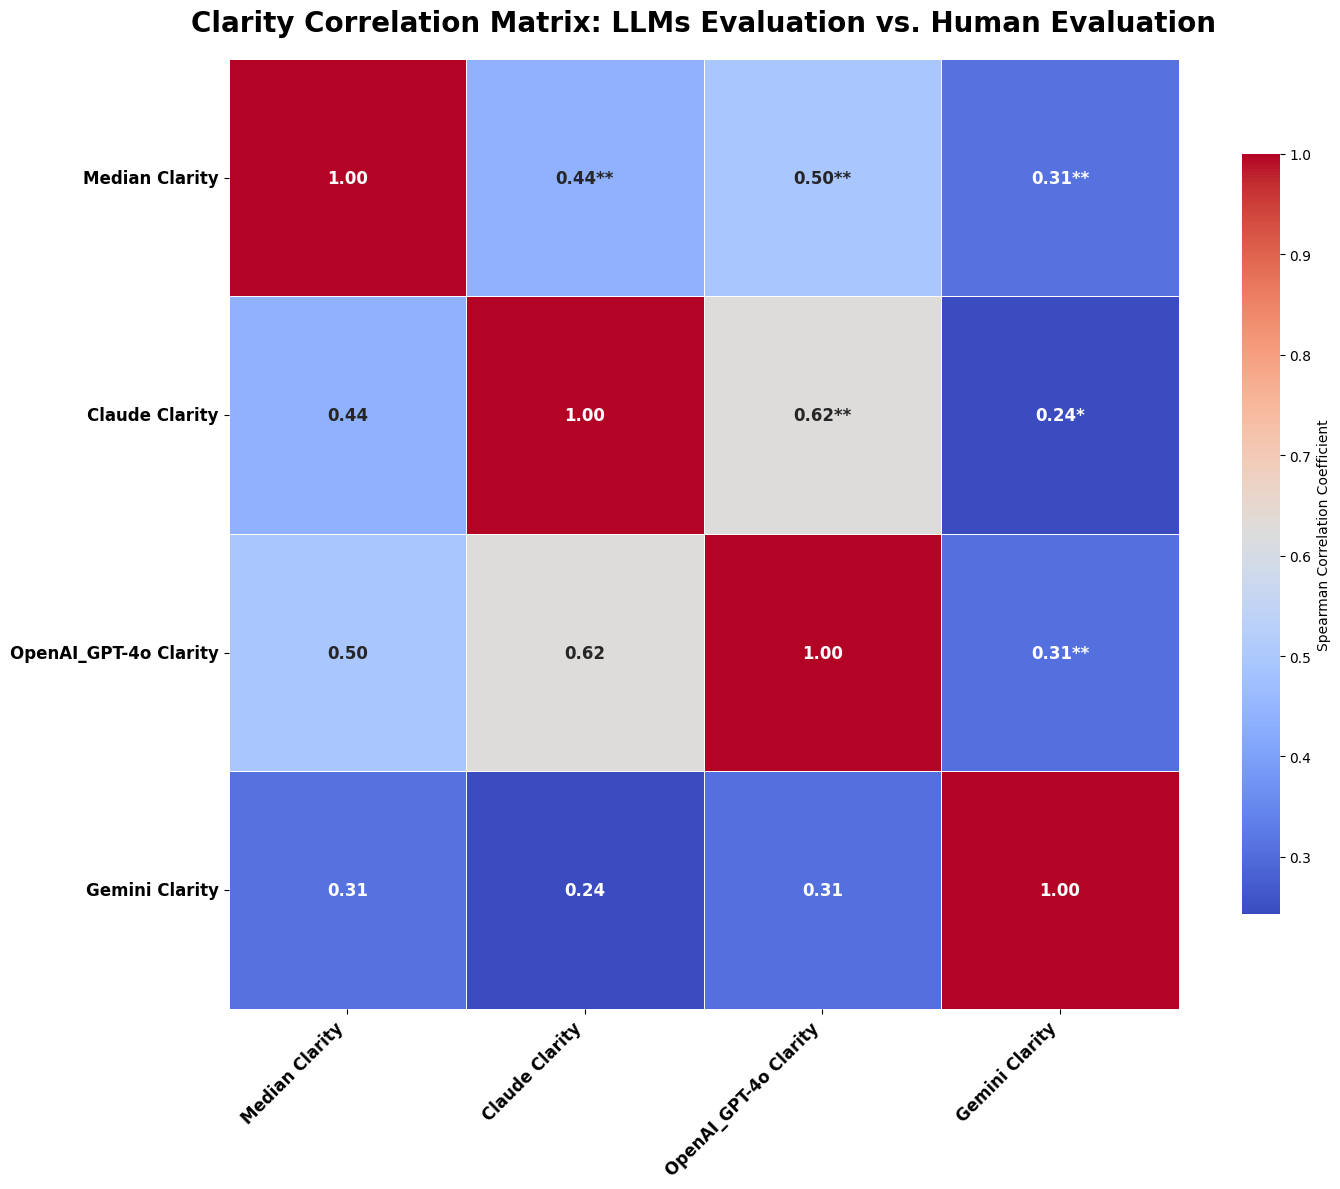

In [50]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr, shapiro
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Descriptive Statistics
descriptive_stats = df.describe().transpose()
descriptive_stats['median'] = df.median()
descriptive_stats['variance'] = df.var()
descriptive_stats['range'] = df.max() - df.min()
print("Descriptive Statistics:")
print(descriptive_stats)

# 2. Spearman Correlation Matrix with p-values, handling missing values
correlation_matrix = df.corr(method="spearman")  # Initialize correlation matrix with Spearman
p_values_matrix = pd.DataFrame(np.zeros_like(correlation_matrix), columns=df.columns, index=df.columns)

# Calculate Spearman correlations and p-values, handling missing values
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        # Drop rows with NaNs in both columns to ensure equal length
        col_i = df.iloc[:, i]
        col_j = df.iloc[:, j]
        valid_idx = col_i.notna() & col_j.notna()  # Select rows where both columns are non-NaN

        # Only calculate correlation if there are enough data points
        if valid_idx.sum() > 1:
            corr, p_value = spearmanr(col_i[valid_idx], col_j[valid_idx])
            correlation_matrix.iloc[i, j] = corr
            correlation_matrix.iloc[j, i] = corr
            p_values_matrix.iloc[i, j] = p_value
            p_values_matrix.iloc[j, i] = p_value

print("\nSpearman Correlation Matrix:")
print(correlation_matrix)
print("\nP-values for Correlation Matrix:")
print(p_values_matrix)

# 3. Normality Testing (Shapiro-Wilk Test)
normality_results = {}
for column in df.columns:
    stat, p_value = shapiro(df[column].dropna())
    normality_results[column] = {"Shapiro-Wilk Statistic": stat, "p-value": p_value}
normality_df = pd.DataFrame(normality_results).transpose()
print("\nNormality Test (Shapiro-Wilk) Results:")
print(normality_df)

# Annotate both correlation and significance levels
annot_matrix = correlation_matrix.applymap(lambda x: f"{x:.2f}")
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        if i < j:
            p_val = p_values_matrix.iloc[i, j]
            if p_val < 0.05:
                annot_matrix.iloc[i, j] += "*"  # Indicate significance at p < 0.05
            if p_val < 0.01:
                annot_matrix.iloc[i, j] += "*"  # Add another star for p < 0.01


# Set up the figure with a larger size and customized color map
fig, ax = plt.subplots(figsize=(15, 12))
cmap = sns.color_palette("coolwarm", as_cmap=True)  # Use color-blind friendly color map


# Plot the heatmap with specified color map and increased annotation font size
sns.heatmap(
    correlation_matrix,
    cmap=cmap,  # Explicitly use coolwarm for clear red-blue contrast
    cbar_kws={"shrink": 0.8, "label": "Spearman Correlation Coefficient"},  # Color bar label
    annot_kws={"size": 12, "weight": "bold"},  # Increased font size and bold font for annotations
    annot=annot_matrix, fmt="", square=True,
    linewidths=0.5
    # center=0  # Ensure color divergence around zero
)

# Customize axis tick labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')

# Set title and layout adjustments
plt.title("Clarity Correlation Matrix: LLMs Evaluation vs. Human Evaluation", fontsize=20, weight='bold', pad=20)

plt.tight_layout()  # Ensure everything fits within the figure
plt.show()


LLMs vs Automatic Evaluation


Spearman

Descriptive Statistics:
                                count      mean       std       min       25%  \
BLEU                            101.0  0.204777  0.203567  0.009526  0.065356   
ROUGE                           101.0  0.437597  0.197272  0.066667  0.307692   
BLEURT                          101.0  0.641096  0.127159  0.119060  0.571327   
METEOR                          101.0  0.556878  0.191469  0.135870  0.428258   
BERTScore                       101.0  0.478921  0.180800  0.074741  0.354420   
BARTScore                       101.0  0.772516  0.086235  0.507976  0.723005   
Claude Informativeness         6464.0  5.455446  0.980324  2.000000  5.000000   
Claude Clarity                 6464.0  5.930693  0.914828  2.000000  6.000000   
Claude Effectiveness           6464.0  4.980198  1.098961  2.000000  4.000000   
OpenAI_GPT-4o Informativeness  6464.0  5.247525  1.084683  2.000000  5.000000   
OpenAI_GPT-4o Clarity          6464.0  5.851485  1.066084  3.000000  5.000000   
Open

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6464.
  res = hypotest_fun_out(*samples, **kwds)
<ipython-input-51-be2fbe8ce3db>:55: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_matrix = correlation_matrix.applymap(lambda x: f"{x:.2f}")


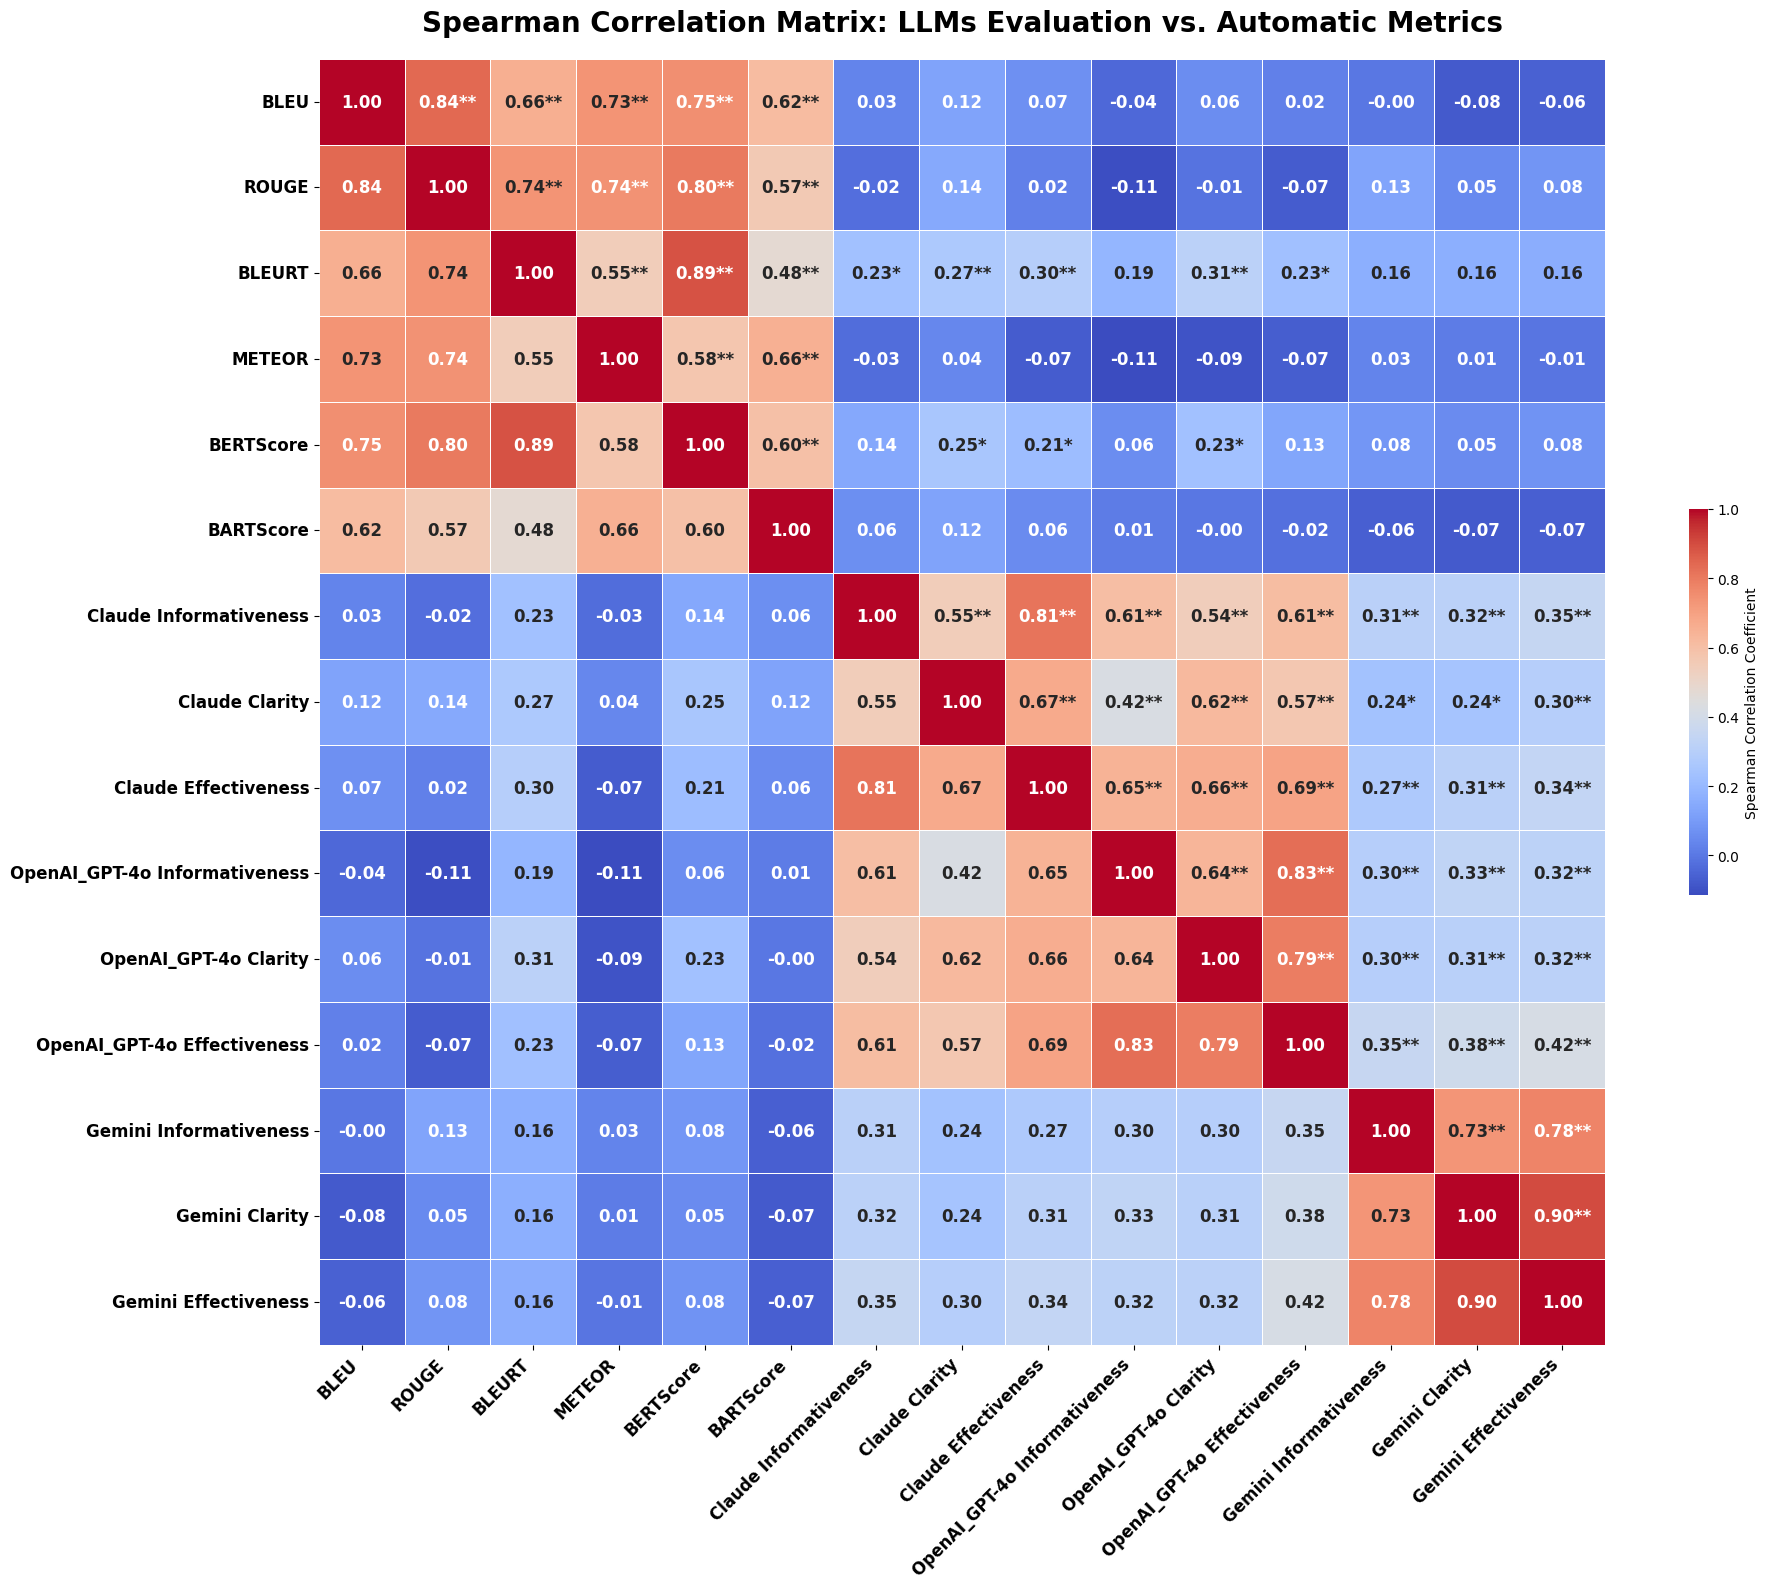

In [51]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr, shapiro
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/llm_auto.csv")

df = df.apply(pd.to_numeric, errors='coerce')

# 1. Descriptive Statistics
descriptive_stats = df.describe().transpose()
descriptive_stats['median'] = df.median()
descriptive_stats['variance'] = df.var()
descriptive_stats['range'] = df.max() - df.min()
print("Descriptive Statistics:")
print(descriptive_stats)

# 2. Spearman Correlation Matrix with p-values, handling missing values
correlation_matrix = df.corr(method="spearman")  # Initialize correlation matrix with Spearman
p_values_matrix = pd.DataFrame(np.zeros_like(correlation_matrix), columns=df.columns, index=df.columns)

# Calculate Spearman correlations and p-values, handling missing values
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        # Drop rows with NaNs in both columns to ensure equal length
        col_i = df.iloc[:, i]
        col_j = df.iloc[:, j]
        valid_idx = col_i.notna() & col_j.notna()  # Select rows where both columns are non-NaN

        # Only calculate correlation if there are enough data points
        if valid_idx.sum() > 1:
            corr, p_value = spearmanr(col_i[valid_idx], col_j[valid_idx])
            correlation_matrix.iloc[i, j] = corr
            correlation_matrix.iloc[j, i] = corr
            p_values_matrix.iloc[i, j] = p_value
            p_values_matrix.iloc[j, i] = p_value

print("\nSpearman Correlation Matrix:")
print(correlation_matrix)
print("\nP-values for Correlation Matrix:")
print(p_values_matrix)

# 3. Normality Testing (Shapiro-Wilk Test)
normality_results = {}
for column in df.columns:
    stat, p_value = shapiro(df[column].dropna())
    normality_results[column] = {"Shapiro-Wilk Statistic": stat, "p-value": p_value}
normality_df = pd.DataFrame(normality_results).transpose()
print("\nNormality Test (Shapiro-Wilk) Results:")
print(normality_df)

# Annotate both correlation and significance levels
annot_matrix = correlation_matrix.applymap(lambda x: f"{x:.2f}")
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        if i < j:
            p_val = p_values_matrix.iloc[i, j]
            if p_val < 0.05:
                annot_matrix.iloc[i, j] += "*"  # Indicate significance at p < 0.05
            if p_val < 0.01:
                annot_matrix.iloc[i, j] += "*"  # Add another star for p < 0.01


# Set up the figure with a larger size and customized color map
fig, ax = plt.subplots(figsize=(20, 16))
cmap = sns.color_palette("coolwarm", as_cmap=True)  # Use color-blind friendly color map


# Plot the heatmap with specified color map and increased annotation font size
sns.heatmap(
    correlation_matrix,
    cmap=cmap,  # Explicitly use coolwarm for clear red-blue contrast
    cbar_kws={"shrink": 0.3, "label": "Spearman Correlation Coefficient"},  # Color bar label
    annot_kws={"size": 12, "weight": "bold"},  # Increased font size and bold font for annotations
    annot=annot_matrix, fmt="", square=True,
    linewidths=0.7
    # center=0  # Ensure color divergence around zero
)

# Customize axis tick labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')

# Set title and layout adjustments
plt.title("Spearman Correlation Matrix: LLMs Evaluation vs. Automatic Metrics", fontsize=20, weight='bold', pad=20)

plt.tight_layout()  # Ensure everything fits within the figure
plt.show()


LLM AUTO HUMAN

Descriptive Statistics:
                                count      mean       std       min       25%  \
BLEU                            101.0  0.204777  0.203567  0.009526  0.065356   
ROUGE                           101.0  0.437597  0.197272  0.066667  0.307692   
BLEURT                          101.0  0.641096  0.127159  0.119060  0.571327   
METEOR                          101.0  0.556878  0.191469  0.135870  0.428258   
BERTScore                       101.0  0.478921  0.180800  0.074741  0.354420   
BARTScore                       101.0  0.772516  0.086235  0.507976  0.723005   
Median Clarity                 6464.0  5.470297  1.254440  1.500000  5.000000   
Median Informativeness         6464.0  5.767327  0.971357  2.000000  5.000000   
Median  Effectiveness          6464.0  5.470297  1.185443  2.500000  5.000000   
Claude Informativeness         6464.0  5.455446  0.980324  2.000000  5.000000   
Claude Clarity                 6464.0  5.930693  0.914828  2.000000  6.000000   
Clau

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6464.
  res = hypotest_fun_out(*samples, **kwds)
<ipython-input-52-18f9fd0699b1>:55: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot_matrix = correlation_matrix.applymap(lambda x: f"{x:.2f}")


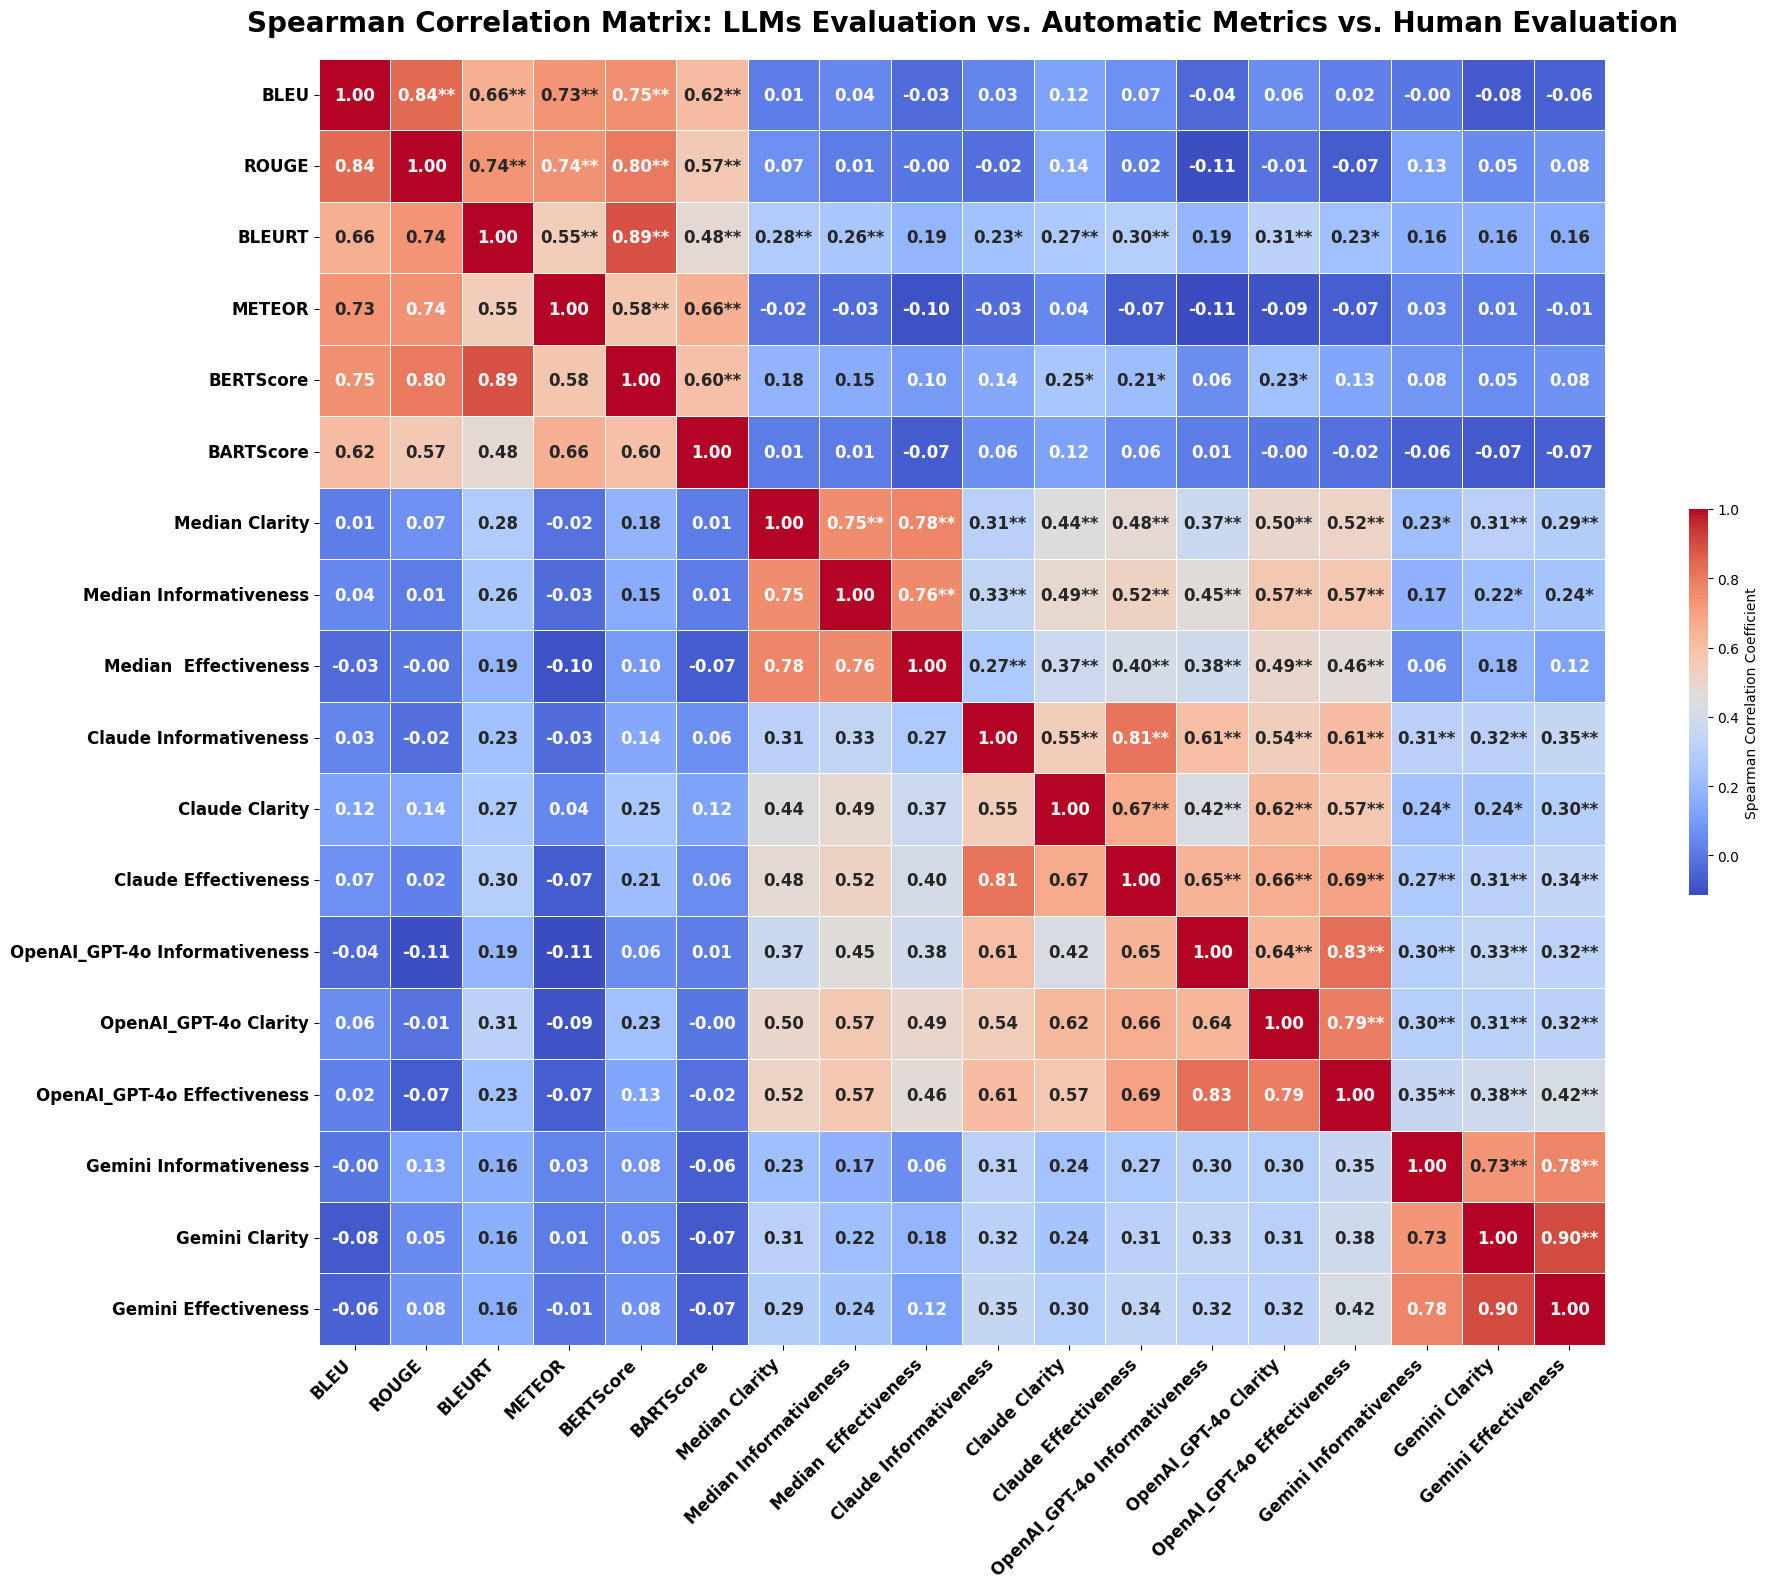

In [52]:
import pandas as pd
import numpy as np
from scipy.stats import spearmanr, shapiro
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("/content/llm_auto_human.csv")

df = df.apply(pd.to_numeric, errors='coerce')

# 1. Descriptive Statistics
descriptive_stats = df.describe().transpose()
descriptive_stats['median'] = df.median()
descriptive_stats['variance'] = df.var()
descriptive_stats['range'] = df.max() - df.min()
print("Descriptive Statistics:")
print(descriptive_stats)

# 2. Spearman Correlation Matrix with p-values, handling missing values
correlation_matrix = df.corr(method="spearman")  # Initialize correlation matrix with Spearman
p_values_matrix = pd.DataFrame(np.zeros_like(correlation_matrix), columns=df.columns, index=df.columns)

# Calculate Spearman correlations and p-values, handling missing values
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        # Drop rows with NaNs in both columns to ensure equal length
        col_i = df.iloc[:, i]
        col_j = df.iloc[:, j]
        valid_idx = col_i.notna() & col_j.notna()  # Select rows where both columns are non-NaN

        # Only calculate correlation if there are enough data points
        if valid_idx.sum() > 1:
            corr, p_value = spearmanr(col_i[valid_idx], col_j[valid_idx])
            correlation_matrix.iloc[i, j] = corr
            correlation_matrix.iloc[j, i] = corr
            p_values_matrix.iloc[i, j] = p_value
            p_values_matrix.iloc[j, i] = p_value

print("\nSpearman Correlation Matrix:")
print(correlation_matrix)
print("\nP-values for Correlation Matrix:")
print(p_values_matrix)

# 3. Normality Testing (Shapiro-Wilk Test)
normality_results = {}
for column in df.columns:
    stat, p_value = shapiro(df[column].dropna())
    normality_results[column] = {"Shapiro-Wilk Statistic": stat, "p-value": p_value}
normality_df = pd.DataFrame(normality_results).transpose()
print("\nNormality Test (Shapiro-Wilk) Results:")
print(normality_df)

# Annotate both correlation and significance levels
annot_matrix = correlation_matrix.applymap(lambda x: f"{x:.2f}")
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        if i < j:
            p_val = p_values_matrix.iloc[i, j]
            if p_val < 0.05:
                annot_matrix.iloc[i, j] += "*"  # Indicate significance at p < 0.05
            if p_val < 0.01:
                annot_matrix.iloc[i, j] += "*"  # Add another star for p < 0.01


# Set up the figure with a larger size and customized color map
fig, ax = plt.subplots(figsize=(20, 16))
cmap = sns.color_palette("coolwarm", as_cmap=True)  # Use color-blind friendly color map


# Plot the heatmap with specified color map and increased annotation font size
sns.heatmap(
    correlation_matrix,
    cmap=cmap,  # Explicitly use coolwarm for clear red-blue contrast
    cbar_kws={"shrink": 0.3, "label": "Spearman Correlation Coefficient"},  # Color bar label
    annot_kws={"size": 12, "weight": "bold"},  # Increased font size and bold font for annotations
    annot=annot_matrix, fmt="", square=True,
    linewidths=0.7
    # center=0  # Ensure color divergence around zero
)

# Customize axis tick labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12, weight='bold')
plt.yticks(rotation=0, fontsize=12, weight='bold')

# Set title and layout adjustments
plt.title("Spearman Correlation Matrix: LLMs Evaluation vs. Automatic Metrics vs. Human Evaluation", fontsize=20, weight='bold', pad=20)

plt.tight_layout()  # Ensure everything fits within the figure
plt.show()
